In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from skfeature.function.similarity_based import fisher_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

from xgboost import XGBRegressor
from sklearn.feature_selection import mutual_info_classif
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import learning_curve
from skrebate import MultiSURF
import sys

KeyError: 'scale'

In [2]:
pd.set_option("display.max_columns",3000)  #this allows us to view up to 3000 columns when printing a dataframe
pd.set_option("display.max_rows",3000)  #this allows us to view up to 3000 rows when printing a dataframe

## Read the training Dataset file

In [3]:
dataFrame=pd.read_csv("Train_1000ms_unbalanced.csv")  #reading train dataSet file
dataFrame.head()

,Unnamed: 0,timestamp,ssrc,kind,trackId,packetsReceived,fecPacketsReceived,fecPacketsDiscarded,bytesReceived,packetsLost,jitter,jitterBufferDelay,concealedSamples,silentConcealedSamples,concealmentEvents,insertedSamplesForDeceleration,removedSamplesForAcceleration,[codec],lastPacketReceivedTimestamp,ssrc_hex,pps,codec,payloadType,mimeType,clockRate,direction,label,interarrival_std,interarrival_mean,interarrival_min,interarrival_max,interarrival_count,interarrival_kurtosis,interarrival_skew,interarrival_moment3,interarrival_moment4,interarrival_max_min_diff,interarrival_max_min_R,interarrival_min_max_R,interarrival_len_unique_percent,interarrival_max_value_count_percent,kbps,len_udp_std,len_udp_mean,len_udp_min,len_udp_max,num_packets,len_udp_kurtosis,len_udp_skew,len_udp_moment3,len_udp_moment4,len_udp_max_min_diff,len_udp_max_min_R,len_udp_min_max_R,len_udp_len_unique_percent,len_udp_max_value_count_percent,interlength_udp_std,interlength_udp_mean,interlength_udp_min,interlength_udp_max,interlength_udp_count,interlength_udp_kurtosis,interlength_udp_skew,interlength_udp_moment3,interlength_udp_moment4,interlength_udp_max_min_diff,interlength_udp_max_min_R,interlength_udp_min_max_R,interlength_udp_len_unique_percent,interlength_udp_max_value_count_percent,rtp_inter_timestamp_num_zeros,rtp_inter_timestamp_std,rtp_inter_timestamp_mean,rtp_interarrival_min,rtp_interarrival_max,rtp_interarrival_count,rtp_interarrival_kurtosis,rtp_interarrival_skew,rtp_interarrival_moment3,rtp_interarrival_moment4,rtp_interarrival_max_min_diff,rtp_interarrival_max_min_R,rtp_interarrival_min_max_R,rtp_interarrival_len_unique_percent,rtp_interarrival_max_value_count_percent,rtp_marker_sum_check,rtp_seq_num_packet_loss,rtp_csrc_csrc_agg,inter_time_sequence_std,inter_time_sequence_mean,inter_time_sequence_min,inter_time_sequence_max,inter_time_sequence_count,inter_time_sequence_kurtosis,inter_time_sequence_skew,inter_time_sequence_moment3,inter_time_sequence_moment4,inter_time_sequence_max_min_diff,inter_time_sequence_max_min_R,inter_time_sequence_min_max_R,inter_time_sequence_len_unique_percent,inter_time_sequence_max_value_count_percent,flow,pcap,label2,frameWidth,frameHeight,nackCount,framesReceived,framesDecoded,keyFramesDecoded,framesDropped,totalDecodeTime,[totalDecodeTime/framesDecoded_in_ms],totalInterFrameDelay,[totalInterFrameDelay/framesDecoded_in_ms],qpSum,framesPerSecond,fps,packetsSent,retransmittedPacketsSent,bytesSent,[bytesSent_in_bits/s],framesEncoded,keyFramesEncoded,totalEncodeTime,[totalEncodeTime/framesEncoded_in_ms],framesSent,hugeFramesSent,totalPacketSendDelay,[totalPacketSendDelay/packetsSent_in_ms],qualityLimitationResolutionChanges,[qpSum/framesEncoded],software,ip_src,ip_dst,prt_src,prt_dst,p_type
0,0,2020-12-16 16:54:42,0x30e76675,audio,RTCMediaStreamTrack_sender_1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,"opus (111, minptime=10;useinbandfec=1)",-1.0,0x30e76675,50.0,"opus (111, minptime=10;useinbandfec=1)",111.0,audio/opus,48000.0,sender,0,0.002851,0.020027,0.015486,0.025645,50,-1.371238,0.593144,1.334030e-08,1.034027e-10,0.010159,0.623496,0.376504,0.98,0.04,37.945312,3.516782,97.14,90.0,109.0,50,1.336871,0.721547,30.446688,637.104112,19.0,0.547739,0.452261,0.28,0.16,3.814526,0.02,-12.0,9.0,50,0.896954,-0.131402,-7.075584,792.391824,21.0,0.428571,0.571429,0.30,0.14,0.0,0.0,960.0,960.0,960.0,50,-3.0,0.0,0.0,0.0,0.0,0.5,0.5,0.02,1.0,0,0.0,empty,22112.688799,18814.78,-13122.0,51455.0,50,-1.629247,0.045590,4.782308e+11,3.147585e+17,64577.0,0.796801,0.203199,1.0,0.02,"('0x30e76675', '192.168.1.105', '132.145.230.5...",Debug_Jitsi_av_2p_Gianluca,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,256.0,0.0,13327.0,19485.547594,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,webrtc,192.168.1.105,132.145.230.5,50341,63770,111
1,1,2020-12-16 16:54:43,0x30e76675,audio,RTCMediaStreamTrack_sender_1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,"opus (111, minptime=10;useinbandfec=1

In [4]:
#Selection of all training data I thought it would be useful to count on:
drp_1=dataFrame.iloc[:,0:27]
drp_2=dataFrame.loc[:,"flow":"p_type"]
X_train_main = dataFrame.drop(drp_1+drp_2,axis=1) #axis=0 indicates rows, axis=1 indicates columns
X_train_main = X_train_main.drop(X_train_main.loc[:,'rtp_csrc_csrc_agg':'inter_time_sequence_max_value_count_percent'],axis=1)
# X_train = X_train.drop(X_train.loc[:,"rtp_marker_sum_check"])
X_train_main = X_train_main.drop("rtp_marker_sum_check", axis = 1)

## Reading the Test Dataset file

In [5]:
dataFrame_1=pd.read_csv("Test_1000ms_unbalanced.csv")  #reading test dataSet file

In [6]:
X_test_main = dataFrame_1.loc[:, X_train_main.columns]
X_test_main.shape

(119021, 59)

# Prediction_1: SMOOTHNESS

### Here we'll use some functions in order to be able to make the experimental process faster by trying different algorithms, parameters etc.

#### Func-1. Input Data 

##### For smoothness I have used "framesPerSecond" field from loggs for training the model

In [7]:
def inp_data():
    #use "global" in order to be able to modify a previously defined global varible inside a function
    global X_train
    global X_test
    global y_train
    global y_test
    global X_train_scaled
    global X_test_scaled
    
    print("\n Preparing the input data for the next trial")
    
    #Target values after removing -1 values which means that the relating result was not able to be measured
    y_train = dataFrame[dataFrame["framesPerSecond"]!=-1].framesPerSecond
    y_test = dataFrame_1[dataFrame_1["framesPerSecond"]!=-1].framesPerSecond

    X_train=X_train_main
    X_test=X_test_main
    
    #Drop the non-numerical values and equalize the number of indexes accordingly in order to avoid missmatches
    y_train = y_train.dropna()
    y_test = y_test.dropna()
    X_train = X_train.loc[y_train.index]
    X_test = X_test.loc[y_test.index]

    #Preprocess the dataset (without exctracting the OUTLIERS)
    # Once we have the splitted data, we try to redistribute them in such a way they become normally distributed. 
    # This helps ML algorithms to perform better since it is very difficult for them to predict data which are not somehow normally distributed.
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Check if rows of X_train_aud do match with those of y_train_aud
    (y_train.index==X_train.index).all()

#### Func-2. Outlier function

In [8]:
def outlr(out_value, out_meth):
    
    #use "global" in order to be able to modify a previously defined global varible inside a function
    global X_train
    global y_train
    global X_rem
    
    if out_meth=="IQR":# Identify the Outliers by using Inter-Quartile Range (IQR) proximity rule (this rule is used for skewed distribution of data, or the so called assymetric distributions)
            
        #print("Outliers are being removed")
        #Triming method using IQR score
        print(f"Outliers are being identified with {out_meth}")
            
        treat=input("how do u want to treat the outliers: (remove, or replace)")
            
        #from pandas import DataFrame
        #print("Outliers are being removed")
        #Triming method using IQR score
        print("Outliers are being identified")
            

        for column in X_train.columns:
            #print(f"column being executed is {column}")            
            Q1 = X_train[column].quantile(0.25)
            Q3 = X_train[column].quantile(0.75)
            IQR1 = Q3 - Q1
            low = Q1 - (1.5 * IQR1)
            high = Q3 + (1.5 * IQR1)
            
                
            if treat=="replace":
                #Method-1: Replace outliers with MEDIAN values (not recomended, also not giving good results in our model)
                #med = X_train.loc[((X_train[column] < (Q1 - 1.5 * IQR1)) | (X_train[column] > (Q3 + 1.5 * IQR1))), column].median()
                # Above line means to find the median for each column without taking into account the outliers
                
                #med = X_train.loc[((X_train[column] > (Q1 - 1.5 * IQR1)) | (X_train[column] < (Q3 + 1.5 * IQR1))), column].median()
                #Above line clearly replaces the outlier values with the median, so if the conditiion is met it replaces with median if not writes the same value. This is how np.where works
    
    
                #Method-2: Using FLOORING and CAPPING method which means to replace outliers with min for outliers lower than min and with max for those higher than max
                X_train[column] = np.where((X_train[column] < (Q1 - 1.5 * IQR1)), low, np.where((X_train[column] > (Q3 + 1.5 * IQR1)), high,X_train[column]))
                #Above line clearly replaces the outlier values higher than max with max allowed and min outliers with min value allowed, 
                #so basically if the conditiion is met it replaces it with the next value if not let it as it is (the last value inside .where function which is X_train[column]). This is how np.where works
    
            elif treat=="remove":
                #print("REMOVING method being used")
                X_train[column] = np.where(((X_train[column] < (Q1 - 1.5 * IQR1)) | (X_train[column] > (Q3 + 1.5 * IQR1))), np.nan,X_train[column])
                X_train = X_train.loc[X_train[column].index]
        
        
        if treat=="remove":
            #print("outliers before being removed: ",X_train.isnull().sum())
            X_train = X_train.dropna(axis = 0)   #Remove the NaN values (which are actually outliers but were substituted with NaN for simplicity)
            #print("outliers after being removed: ",X_train.isnull().sum())

        
        y_train = y_train.loc[X_train.index]
        print((y_train.index==X_train.index).all())
            
            # Coment: If we do not remove outliers in the TEST as well, the performance becomes even worse compared to the case where outliers were not removed
            # The reason for the case above might be due to underfitting, so when outliers are removed there are less data for model training.

            
    elif out_meth=="z-score":              # Identify the outliers by using empirical relations for Normal distribution (assuming that our dataset is normally distributed)
        #print("Training dataset size before removing outliers: ",X_train.shape)
        
        print(f"Outliers are being identified with {out_meth}")    
        treat=input("how do u want to treat the outliers: (remove, or replace)")
 
        for column in X_train.columns:
            
            highest_limit=(X_train[column].mean() + 3*X_train[column].std())
            lowest_limit=(X_train[column].mean() - 3*X_train[column].std())
            
            if treat=="replace":
                X_train[column] = np.where((X_train[column] < lowest_limit), lowest_limit, np.where((X_train[column] > highest_limit), highest_limit,X_train[column]))

                
                #X_train[column] = np.where((X_train[column] < lowest_limit, lowest_limit, np.where(X_train[column] > highest_limit,highest_limit,X_train[column])))
                
            elif treat=="remove":
                #print("REMOVING method being used")
                X_train[column] = np.where(((X_train[column] < lowest_limit ) | (X_train[column] > highest_limit )), np.nan,X_train[column])
                X_train = X_train.loc[X_train[column].index]
    
        if treat=="remove":
            #print("outliers before being removed: ",X_train.isnull().sum())
            X_train = X_train.dropna(axis = 0)   #Remove the NaN values (which are actually outliers but were substituted with NaN for simplicity)
            #print("outliers after being removed: ",X_train.isnull().sum())
        
        y_train = y_train.loc[X_train.index]
        print((y_train.index==X_train.index).all())
            
        # COMENT: Also here the removal of outliers only in training part makes the performace even worse. See it seems these removing outliers techniques is not recommended due to the negative impacts it has.
        # This may be same reason as above but also becasue what we remove isn't actually an outlier. That's why we get worsening in performance

#### Func-3: Feature selection Function

In [9]:
def feat_sel(val):
    
    #use "global" in order to be able to modify a previously defined global varible inside a function
    global X_train
    global X_test
    global y_train
    global y_test
    
    
    if val == "Pearson":
        print('Original number of features:', X_train.shape)
        # define feature selection
        fs = SelectKBest(score_func=f_regression, k=30)
        # apply feature selection
        X_selected = fs.fit_transform(X_train, y_train)
        
        X_train = X_train[X_train.columns[fs.get_support()]]    # Create the dataset using the columns selected from feature selection
        # Balacing the rows and columns of X_train and y_train
        y_train = y_train.loc[X_train.index]
        X_test = X_test[X_train.columns]
        y_test = y_test.loc[X_test.index]
        # print("feat_Sel function being used is: ", val)
        
        print(f'Reduced number of features after {val} selection method:', X_train.shape)
        
        
    elif val == "infoGain":
        print('Original number of features:', X_train.shape)
        importances = mutual_info_classif(X_train,y_train)
        feat_imp=pd.Series(importances, index=X_train.columns)
        #print(feat_imp.nlargest(30).index)
    
        X_train=X_train.loc[:,feat_imp.nlargest(35).index]        #Use the best 35 fields/columns of the X_train
        #X_test=X_test.loc[:,X_train.columns]
        y_train = y_train.loc[X_train.index]
        X_test = X_test[X_train.columns]
        y_test = y_test.loc[X_test.index]
        # print("feat_Sel function being used is: ", val)
        
        print(f'Reduced number of features after {val} selection method:', X_train.shape)
        
    elif val == "corrCoeff":
        print('Original number of features:', X_train.shape)
        cor = X_train.corr()                                   # Apply correlation coefficient
        columns = np.full((cor.shape[0],), True, dtype=bool)
        for i in range(cor.shape[0]):
            for j in range(i+1, cor.shape[0]):
                if cor.iloc[i,j] >= 0.95:                      #Select only the fields having a correlation less than 95%
                    if columns[j]:
                        columns[j] = False
        selected_columns = X_train.columns[columns]
        X_train = X_train[selected_columns]
        y_train = y_train.loc[X_train.index]
        X_test = X_test[X_train.columns]
        y_test = y_test.loc[X_test.index]
        
        print(f'Reduced number of features after {val} selection method:', X_train.shape)
        # print("feat_Sel function being used is: ", val)
    
    elif val == "anova_f":
        fvalue_Best = SelectKBest(f_classif, k=30)
        X_kbest = fvalue_Best.fit_transform(X_train, y_train)
        X_train = X_train[X_train.columns[fvalue_Best.get_support()]]    #Use only the fields selected by the feature selection method called "ANOVA F-VALUE"
        y_train = y_train.loc[X_train.index]
        X_test = X_test[X_train.columns]
        y_test = y_test.loc[X_test.index]
        # print("feat_Sel function being used is: ", val)

        print('Original number of features:', X_train.shape)
        print(f'Reduced number of features using {val} feature selection method is:', X_kbest.shape)
    
    
    else:
        sys.exit("Wrong Feature selection method")
        
        
    

#### Func-4: Decision Tree Algorithm

In [10]:
def dec_tree():
    
    #use "global" in order to be able to modify a previously defined global varible inside a function
    global X_train
    global X_test
    global y_train
    global y_test    
    
    de_tree = DecisionTreeRegressor()                       #enable the decision tree regressor
    de_tree.fit(X_train,y_train)                            #fit the model with x_train and y_train
    predictions = de_tree.predict(X_test)                   # test the trained model with unseen data (X_tets in our case) and see
            
    from sklearn.metrics import r2_score
    R2 = r2_score(predictions, y_test)
    print("R2 score is:",R2)
            
    from sklearn.metrics import mean_absolute_error as mae
    MAE = mae(predictions, y_test)
    print ("Mean Absolute Error is:",MAE)
            
    from sklearn.metrics import mean_squared_error as mse
    MSE = mse (predictions, y_test)
    print ("Mean Squared Error:", MSE)

#### Func-5: Random Forest Algorithm

In [11]:
def Rand_for():
    
    #use "global" in order to be able to modify a previously defined global varible inside a function
    global X_train
    global X_test
    global y_train
    global y_test
    
    Rand_for = RandomForestRegressor()
    Rand_fit = Rand_for.fit(X_train, y_train)
    pred = Rand_fit.predict(X_test)
        
    from sklearn.metrics import r2_score
    R2 = r2_score(pred, y_test)
    print("R2 score is:",R2)
        
    from sklearn.metrics import mean_absolute_error as mae
    MAE = mae(pred, y_test)
    print ("Mean Absolute Error is:",MAE)
        
    from sklearn.metrics import mean_squared_error as mse
    MSE = mse (pred, y_test)
    print ("Mean Squared Error:", MSE)

#### Func-6) Learning Curve Plot

In [12]:
def lear_cur(est):
    train_sizes=[1,1000,10000,35000,75000,100000]     #These are the indexes of X_train data to be used to vary
    
    print("LEARNING CURVE BEING EXECUTED")
    if est=="decisionTree":
        est = DecisionTreeRegressor()
    elif est=="randomForest":
        est = RandomForestRegressor()
    
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator = est,
    X = X_train,
    y = y_train, train_sizes = train_sizes, cv = 5,
    scoring = 'neg_mean_squared_error')
    # estimator — indicates the learning algorithm we use to estimate the true model;
    # X — the data containing the features;
    # y — the data containing the target;
    # train_sizes — specifies the training set sizes to be used;
    # cv — determines the cross-validation splitting strategy (we’ll discuss this immediately);
    # scoring — indicates the error metric to use; the intention is to use the mean squared error (MSE) metric, but that’s not a possible parameter for scoring; we’ll use the nearest proxy, negative MSE, and we’ll just have to flip signs later on.
   

    # Here we take the average of each score above (there are 5 because of cv=5 which iterates 5 times and gives 5 different MSE values)
    # Note that the scoring type used is "accuracy" instead of "MSE" used in regression
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
    print('\n', '-' * 20) # separator
    print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
    
    
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title(f'Learning curves for a {est} model', fontsize = 18, y = 1.03)
    plt.legend()

#### Func-7) Main Function Manual Run

In [13]:
def smooth_pred():                                                     #create the function
    alg=input("Algorithm to be used(decisionTree, randomForest): ")    #Ask for user input    
    if alg == "decisionTree":                                          #Check the input value and accordingly apply the next steps
        print(f"We are using {alg} algorithm")
        outlier=input("Do you want to process the outliers(yes or no): ")
        outlier_val=input("Which method do you want to use (IQR or z-score): ")
        
        if outlier == "yes":
            inp_data()
            outlr(outlier, outlier_val)
            #dec_tree()
            feat=input("Do you want to do feature selection (yes or no): ")
            if feat == "yes":              
                feat_val=input("which feature selection method do you want to use (Pearson, corrCoeff, infoGain, anova_f): ")
                feat_sel(feat_val)              
                #lear_cur(alg)
                dec_tree()
                
            else:                
                #lear_cur(alg)
                dec_tree()
                print("END of DecisionTree execution")
                
        
        else:
            feat=input("Do you want to do feature selection (yes or no): ")
            inp_data()
            if feat == "yes":              
                feat_val=input("which feature selection method do you want to use (Pearson, corrCoeff, infoGain, anova_f): ")
                feat_sel(feat_val)              
                #lear_cur(alg)
                dec_tree()
                
            else:                
                #lear_cur(alg)
                dec_tree()
                print("END of DecisionTree execution")
            
    elif alg == "randomForest":
        print(f"We are using {alg} algorithm")
        outlier=input("Do you want to process the outliers(yes or no):")
        outlier_val=input("Which method do you want to use (IQR or z-score): ")
        
        if outlier == "yes":  
            inp_data()
            outlr(outlier, outlier_val)   
            #Rand_for()
            feat=input("Do you want to do feature selection (yes or no): ")
            if feat == "yes":              
                feat_val=input("which feature selection method do you want to use (Pearson, corrCoeff, infoGain, anova_f): ")
                feat_sel(feat_val)              
                #lear_cur(alg)
                Rand_for()
                
            else:                
                #lear_cur(alg)
                Rand_for()
                print("END of RandomForest execution")
            
            
            
        else:
            feat=input("Do you want to do feature selection (yes or no): ")
            inp_data()
            
            if feat == "yes":
                feat_val=input("which feature selection method do you want to use (Pearson, corrCoeff, infoGain, anova_f): ")
                feat_sel(feat_val)              
                #lear_cur(alg)
                Rand_for()
                
            else:
                #lear_cur(alg)
                Rand_for()
                print("END of Random Forest execution")
        

In [14]:
smooth_pred()            #Run the manual code 

KeyboardInterrupt: Interrupted by user

In [16]:
# Dataframe to list convertion process
X_tr_list=[]
for column in X_train.columns:
     
    # Storing the rows of a column
    # into a temporary list
    lis = X_train[column].tolist()
     
    # appending the temporary list
    X_tr_list.append(lis)

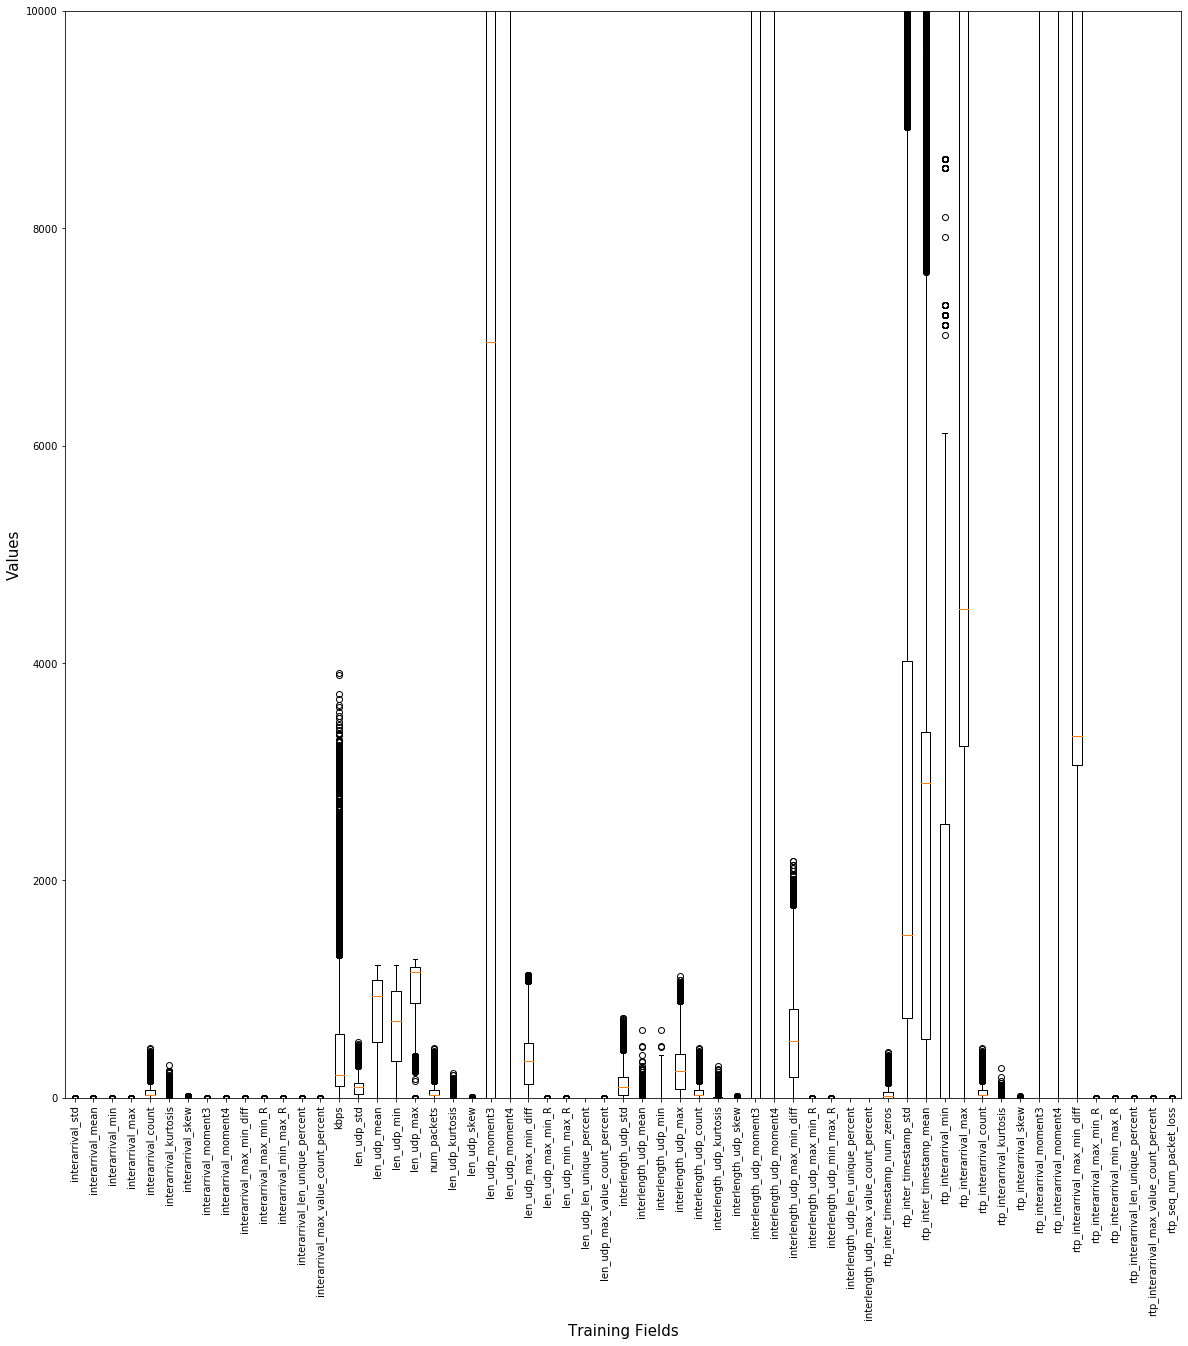

In [18]:
fig = plt.figure(figsize=(20,20))
ax = fig.subplots()
bp = ax.boxplot(X_tr_list)
ax.set(ylim=(0, 10000))
ax.set_xticklabels(X_train.columns,rotation=90)
ax.set_ylabel('Values',fontsize = 15)
ax.set_xlabel('Training Fields',fontsize = 15)
plt.show()

#### Func-7) Main Function Automatic Run

### NOTE: Automatic Running below has some problems with OUTLIERS, needs to be reviewed. For now run the manual code above (it's the same just the inputs are insert manually)

In [373]:
def smooth_pred():                                                     #create the function
    #alg=input("Algorithm to be used(decisionTree, randomForest): ")    #Ask for user input    
    algorithms = ["decisionTree","randomForest"]
    for alg in algorithms:    
        if alg == "decisionTree":                                          #Check the input value and accordingly apply the next steps
            #print(f"We are using {alg} algorithm")
            extract_outliers=["no","yes"]
            #outlier=input("Do you want to exctract outliers(yes or no): ")
            for outlier in extract_outliers:
                if outlier == "yes":
                    outlier_method=["IQR"]
                    for feat in ["no", "yes"]:
                        if feat == "yes":              
                            feat_sel_method=["Pearson", "corrCoeff", "anova_f"]
                            #feat_val=input("which feature selection method do you want to use (Pearson, corrCoeff, infoGain, anova_f): ")
                            for feat_val in feat_sel_method:
                                for outlier_val in outlier_method:
                                    inp_data()
                                    out_treat=["remove","replace"]
                                    for treat in out_treat:
                                        outlr(outlier, outlier_val,treat)
                                        feat_sel(feat_val)              
                                    
                                        print(f"These are the results for {alg} algorithm, outliers identified with {outlier_val} method and treated with {treat} outlier technique and using {feat_val} feature selection:")
                                        dec_tree()
                
                        else:                
                            for outlier_val in outlier_method:
                                inp_data()
                                out_treat=["remove","replace"]
                                for treat in out_treat:
                                    outlr(outlier, outlier_val,treat)
                                    print(f"These are the results for {alg} algorithm, outliers identified with {outlier_val} method and treated with {treat} outlier technique and using {feat_val} feature selection:")
                                    dec_tree()
                                    #print("END of DecisionTree execution")
                
        
                else:
                    for feat in ["no", "yes"]:
                        if feat == "yes":              
                            feat_sel_method=["Pearson", "corrCoeff", "anova_f"]
                            #feat_val=input("which feature selection method do you want to use (Pearson, corrCoeff, infoGain, anova_f): ")
                            for feat_val in feat_sel_method:
                                inp_data()
                                feat_sel(feat_val)              
                                print(f"These are the results for {alg} algorithm, outliers not processed and using {feat_val} feature selection:")
                                dec_tree()
                
                        else:                
                            inp_data()
                            print(f"These are the results for {alg} algorithm, outliers not processed and no feature selection used:")
                            dec_tree()
                            # print("END of DecisionTree execution")
                            
                            
            
        elif alg == "randomForest":                                          #Check the input value and accordingly apply the next steps
            #print(f"We are using {alg} algorithm")
            extract_outliers=["no","yes"]
            #outlier=input("Do you want to exctract outliers(yes or no): ")
            for outlier in extract_outliers:
                if outlier == "yes":
                    outlier_method=["IQR"]
                    for feat in ["no", "yes"]:
                        if feat == "yes":              
                            feat_sel_method=["Pearson", "corrCoeff", "anova_f"]
                            #feat_val=input("which feature selection method do you want to use (Pearson, corrCoeff, infoGain, anova_f): ")
                            for feat_val in feat_sel_method:
                                for outlier_val in outlier_method:
                                    inp_data()
                                    out_treat=["remove","replace"]
                                    for treat in out_treat:
                                        outlr(outlier, outlier_val, treat)
                                        feat_sel(feat_val)              
                                        print(f"These are the results for {alg} algorithm, outliers identified with {outlier_val} method and treated with {treat} outlier technique and using {feat_val} feature selection:")
                                        Rand_for()
                
                        else:                
                            for outlier_val in outlier_method:
                                inp_data()
                                out_treat=["remove","replace"]
                                for treat in out_treat:
                                    outlr(outlier, outlier_val, treat)
                                    print(f"These are the results for {alg} algorithm, outliers identified with {outlier_val} method and treated with {treat} outlier technique and using {feat_val} feature selection:")
                                    Rand_for()
                                    #print("END of DecisionTree execution")
                
        
                else:
                    for feat in ["no", "yes"]:
                        if feat == "yes":              
                            feat_sel_method=["Pearson", "corrCoeff", "anova_f"]
                            #feat_val=input("which feature selection method do you want to use (Pearson, corrCoeff, infoGain, anova_f): ")
                            for feat_val in feat_sel_method:
                                inp_data()
                                feat_sel(feat_val)              
                                print(f"These are the results for {alg} algorithm, outliers not processed and using {feat_val} feature selection:")
                                Rand_for()
                
                        else:                
                            inp_data()
                            print(f"These are the results for {alg} algorithm, outliers not processed and no feature selection used:")
                            Rand_for()
                            # print("END of DecisionTree execution")

In [374]:
smooth_pred()   #Run the automatic code


 Preparing the input data for the next trial
These are the results for decisionTree algorithm, outliers not processed and no feature selection used:
R2 score is: 0.8396631444957957
Mean Absolute Error is: 1.6340163369918337
Mean Squared Error: 18.496601861180473

 Preparing the input data for the next trial
Original number of features: (133817, 59)
Reduced number of features after Pearson selection method: (133817, 30)
These are the results for decisionTree algorithm, outliers not processed and using Pearson feature selection:
R2 score is: 0.8353294615045164
Mean Absolute Error is: 1.7068480348125203
Mean Squared Error: 19.188934624873855

 Preparing the input data for the next trial
Original number of features: (133817, 59)
Reduced number of features after corrCoeff selection method: (133817, 40)
These are the results for decisionTree algorithm, outliers not processed and using corrCoeff feature selection:
R2 score is: 0.8403585988037113
Mean Absolute Error is: 1.6337080267083643
Mea

/home/det_tesi/ygurra/.local/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


R2 score is: 0.46173021386649016
Mean Absolute Error is: 3.694728775039199
Mean Squared Error: 52.37567608040732
Outliers are being identified
Outliers are being identified
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING metho

/home/det_tesi/ygurra/.local/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [58] are constant.
  UserWarning)
/home/det_tesi/ygurra/.local/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


R2 score is: 0.5769019135938414
Mean Absolute Error is: 2.9767357868959317
Mean Squared Error: 43.692848082310036
Outliers are being identified
Outliers are being identified
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING method being used
REPLACING meth

KeyboardInterrupt: 

In [63]:
smooth_pred()          #Run the automatic code


 Preparing the input data for the next trial
These are the results for decisionTree algorithm, without removing OUTLIERS and without using any feature selection method:
R2 score is: 0.8294192651526893
Mean Absolute Error is: 1.6725286958297683
Mean Squared Error: 19.74858826029254

 Preparing the input data for the next trial
Original number of features: (133817, 59)
Reduced number of features after Pearson selection method: (133817, 30)
These are the results for decisionTree algorithm, without removing OUTLIERS and Pearson feature selection method:
R2 score is: 0.8349802854665463
Mean Absolute Error is: 1.7016948486459624
Mean Squared Error: 19.24760607181806

 Preparing the input data for the next trial
Original number of features: (133817, 59)
Reduced number of features after corrCoeff selection method: (133817, 40)
These are the results for decisionTree algorithm, without removing OUTLIERS and corrCoeff feature selection method:
R2 score is: 0.8415710885128463
Mean Absolute Error 

/home/det_tesi/ygurra/.local/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


R2 score is: 0.8020405573636237
Mean Absolute Error is: 1.405117324013979
Mean Squared Error: 16.543871692461305

 Preparing the input data for the next trial
Outliers are being removed
Original number of features: (91613, 59)
Reduced number of features after corrCoeff selection method: (91613, 46)
These are the results for decisionTree algorithm, REMOVED OUTLIERS and using corrCoeff feature selection method:
R2 score is: 0.8103044001399903
Mean Absolute Error is: 1.3710184722915626
Mean Squared Error: 15.319620569146279

 Preparing the input data for the next trial
Outliers are being removed


/home/det_tesi/ygurra/.local/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [58] are constant.
  UserWarning)
/home/det_tesi/ygurra/.local/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Original number of features: (91613, 30)
Reduced number of features using anova_f feature selection method is: (91613, 30)
These are the results for decisionTree algorithm, REMOVED OUTLIERS and using anova_f feature selection method:
R2 score is: 0.7997875073653776
Mean Absolute Error is: 1.4137169246130803
Mean Squared Error: 16.75692086869695

 Preparing the input data for the next trial
These are the results for randomForest algorithm, without removing OUTLIERS and without using any feature selection method:
R2 score is: 0.8646705367020928
Mean Absolute Error is: 1.4345976288446975
Mean Squared Error: 15.055777737394678

 Preparing the input data for the next trial
Original number of features: (133817, 59)
Reduced number of features after Pearson selection method: (133817, 30)
These are the results for randomForest algorithm, without removing OUTLIERS and Pearson feature selection method:
R2 score is: 0.863541245179564
Mean Absolute Error is: 1.4887097191623981
Mean Squared Error: 1

/home/det_tesi/ygurra/.local/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


R2 score is: 0.8560432729895318
Mean Absolute Error is: 1.152280329505741
Mean Squared Error: 11.332809940089867

 Preparing the input data for the next trial
Outliers are being removed
Original number of features: (91613, 59)
Reduced number of features after corrCoeff selection method: (91613, 46)
These are the results for randomForest algorithm, REMOVED OUTLIERS and using corrCoeff feature selection method:
R2 score is: 0.8559465156876256
Mean Absolute Error is: 1.17506328007988
Mean Squared Error: 10.934377987393908

 Preparing the input data for the next trial
Outliers are being removed


/home/det_tesi/ygurra/.local/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [58] are constant.
  UserWarning)
/home/det_tesi/ygurra/.local/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Original number of features: (91613, 30)
Reduced number of features using anova_f feature selection method is: (91613, 30)
These are the results for randomForest algorithm, REMOVED OUTLIERS and using anova_f feature selection method:
R2 score is: 0.8603142830349573
Mean Absolute Error is: 1.1350753869196204
Mean Squared Error: 10.989504335996006


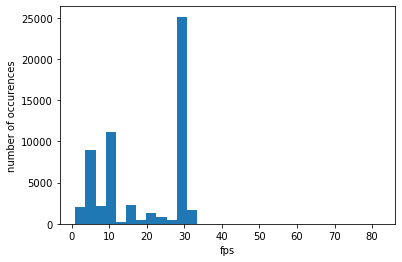

In [19]:
plt.hist(y_test, bins=30)
plt.xlabel("fps")
plt.ylabel("number of occurences")
plt.show()

In [23]:
X_train.shape

(133817, 40)

In [36]:
importances = mutual_info_classif(X_train,y_train)
feat_imp=pd.Series(importances, dataFrame.columns[0:len(dataFrame.columns)-1])
feat_imp.plot(kind='barh', color = 'teal')
plt.show

ValueError: Unknown label type: 'continuous'

In [51]:
X_train.shape

(91613, 59)

#### Comment:
By using Random Forest with feature selection (Pearson) we obtain the following results:
1) R2 score is: 0.863736043785198
2) Mean Absolute Error is: 1.4872515404071807
3) Mean Squared Error: 15.328538191355834

#### Comment: 
By using Random Forest without OUTLIERS we obtained the following results:
1) R2 score is: 0.8561413576357606
2) Mean Absolute Error is: 1.172214178731902
3) Mean Squared Error: 10.906737839490763

# Feature Selection

### Method-1) Data correlation

Variables should be correlated with the target but should be uncorrelated among themselves

In [35]:
# creating a new var by including also the target in order to see also the correlation between input values and target 
X_train1=pd.concat([X_train,y_train], axis=1)

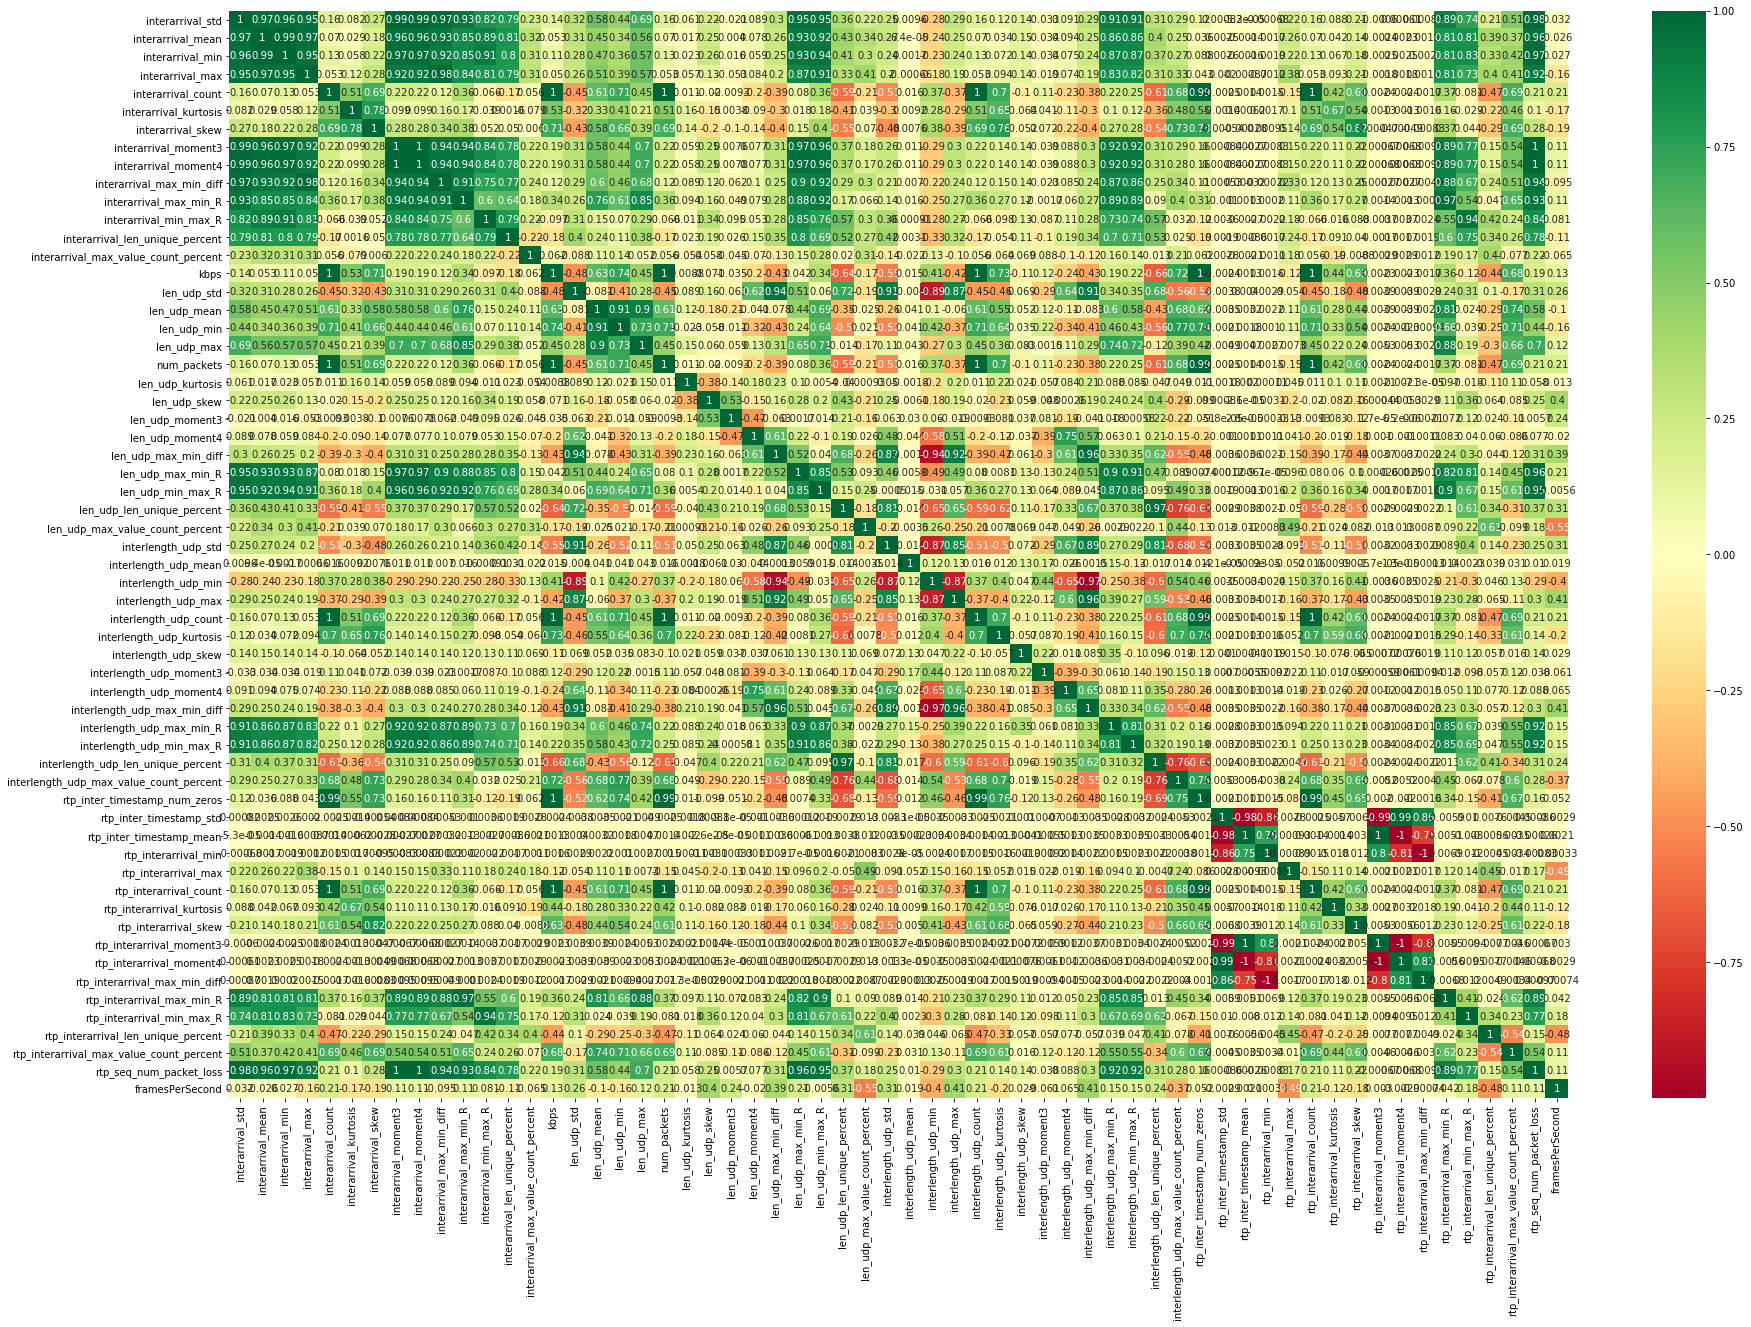

In [36]:
cor = X_train1.corr()
plt.figure(figsize=(30,20))
sns.heatmap(cor,annot=True, cmap="RdYlGn")

Comments: According to what we see in the graph the features which are less correlated to each other are: "rtp_interarrival_min_max_diff", "rtp_interarrival_moment3", "rtp_interarrival_moment4", "rtp_interarrival_min", "rtp_inter_timestamp_mean", "rtp_inter_timestamp_std", "len_udp_moment4", "len_udp_moment3", "len_udp_kurtosis", "kbps", "rtp_seq_num_packet_loss", "interarrival_max_value_count_percent", "interlength_udp_mean".

In [37]:
X_train_sel = X_train [["rtp_interarrival_max_min_diff", "rtp_interarrival_moment3", "rtp_interarrival_moment4", "rtp_interarrival_min", "rtp_inter_timestamp_mean", "rtp_inter_timestamp_std", "len_udp_moment4", "len_udp_moment3", "len_udp_kurtosis", "kbps", "rtp_seq_num_packet_loss", "interarrival_max_value_count_percent", "interlength_udp_mean"]]

In [38]:
# Balacing the rows and columns of X_train and y_train
y_train_sel = y_train.loc[X_train_sel.index]
X_test_sel = X_test[X_train_sel.columns]
y_test_sel = y_test.loc[X_test_sel.index]

In [39]:
# Check if rows of X_train do match with those of y_train
(y_train_sel.index==X_train_sel.index).all()

True

In [40]:
# Check if rows of X_test do match with those of y_test
(y_test_sel.index==X_test_sel.index).all()

True

In [41]:
de_tree = DecisionTreeRegressor()  #enable the decision tree regressor
de_tree.fit(X_train_sel,y_train_sel)  #fit the model with x_train and y_train

predictions = de_tree.predict(X_test_sel)  # test the trained model with unseen data (X_tets in our case) and see
predictions.shape

(56761,)

In [42]:
# R^2 Score
from sklearn.metrics import r2_score
R2 = r2_score(predictions, y_test_sel)
print("R2 score is:",R2)

R2 score is: 0.8405416931459031


In [43]:
# MAE
from sklearn.metrics import mean_absolute_error as mae
MAE = mae(predictions, y_test_sel)
print ("Mean Absolute Error is:",MAE)

Mean Absolute Error is: 1.6326891346287087


In [44]:
# MSE
from sklearn.metrics import mean_squared_error as mse
MSE = mse (predictions, y_test_sel)
print ("Mean Squared Error:", MSE)

Mean Squared Error: 18.38261906000048


### Method-2) Pearson's correlation

In [48]:
# define feature selection
fs = SelectKBest(score_func=f_regression, k=30)
# apply feature selection
X_selected = fs.fit_transform(X_train, y_train)

#### Find which columns were selected using "get_support" command

In [49]:
X_train_selected = X_train[X_train.columns[fs.get_support()]]    # Create the dataset using the columns selected from feature selection

In [50]:
# Balacing the rows and columns of X_train and y_train
y_train_selected = y_train.loc[X_train_selected.index]
X_test_selected = X_test[X_train_selected.columns]
y_test_selected = y_test.loc[X_test_selected.index]

In [51]:
# Check if rows of X_train do match with those of y_train
(y_train_selected.index==X_train_selected.index).all()

True

In [52]:
# Check if rows of X_test do match with those of y_test
(y_test_selected.index==X_test_selected.index).all()

True

### Retrain the model using new dataset after Feature Selection

In [53]:
de_tree = DecisionTreeRegressor()  #enable the decision tree regressor
de_tree.fit(X_train_selected,y_train_selected)  #fit the model with x_train and y_train

DecisionTreeRegressor()

In [54]:
predictions = de_tree.predict(X_test_selected)  # test the trained model with unseen data (X_tets in our case) and see
predictions.shape

(56761,)

In [55]:
# R^2 Score
from sklearn.metrics import r2_score
R2 = r2_score(predictions, y_test_selected)
print("R2 score is:",R2)

R2 score is: 0.8364900180180207


In [56]:
# MAE
from sklearn.metrics import mean_absolute_error as mae
MAE = mae(predictions, y_test_selected)
print ("Mean Absolute Error is:",MAE)

Mean Absolute Error is: 1.697554681982232


In [57]:
# MSE
from sklearn.metrics import mean_squared_error as mse
MSE = mse (predictions, y_test_selected)
print ("Mean Squared Error:", MSE)

Mean Squared Error: 19.030441117007538


Comment: No improvement obtained here as well